<a href="https://colab.research.google.com/github/DurjoyAcharya/Diabetes-Prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action = "ignore")
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [7]:
data_frame = pd.read_csv('/content/drive/MyDrive/Credentials/diabetes.csv')
#About Dataset
#Pregnancies
# Number of times pregnant

# Glucose
# Plasma glucose concentration a 2 hours in an oral glucose tolerance test

# BloodPressure
# Diastolic blood pressure (mm Hg)

# SkinThickness
# Triceps skin fold thickness (mm)

# Insulin
# 2-Hour serum insulin (mu U/ml)

# BMI
# Body mass index (weight in kg/(height in m)^2)

# DiabetesPedigreeFunction
# Diabetes pedigree function

# Age
# Age (years)

# Outcome
# Class variable (0 or 1)

In [8]:
data_frame.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
data_frame.describe()
# It consists of 768 observation units and 9 variables

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
# Print the distribution of the Outcome variable.
data_frame["Outcome"].value_counts()*100/len(data_frame)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

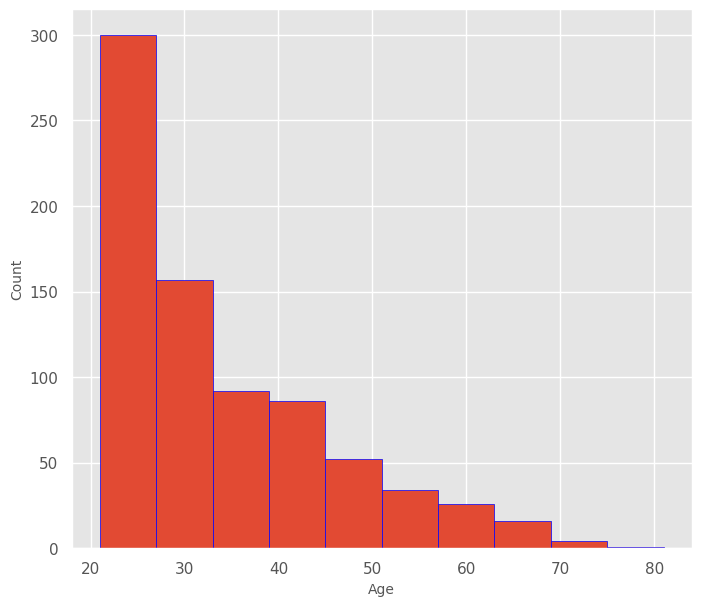

In [21]:
# Plot the histogram of the Age variable
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
data_frame["Age"].hist(edgecolor = "blue");

In [20]:
#Printing age limiting based on data
print("Minimum Age: " + str(data_frame["Age"].min()) +'----'+"Maximum Age: " + str(data_frame["Age"].max()) )

Minimum Age: 21----Maximum Age: 81


<Axes: xlabel='BMI', ylabel='Density'>

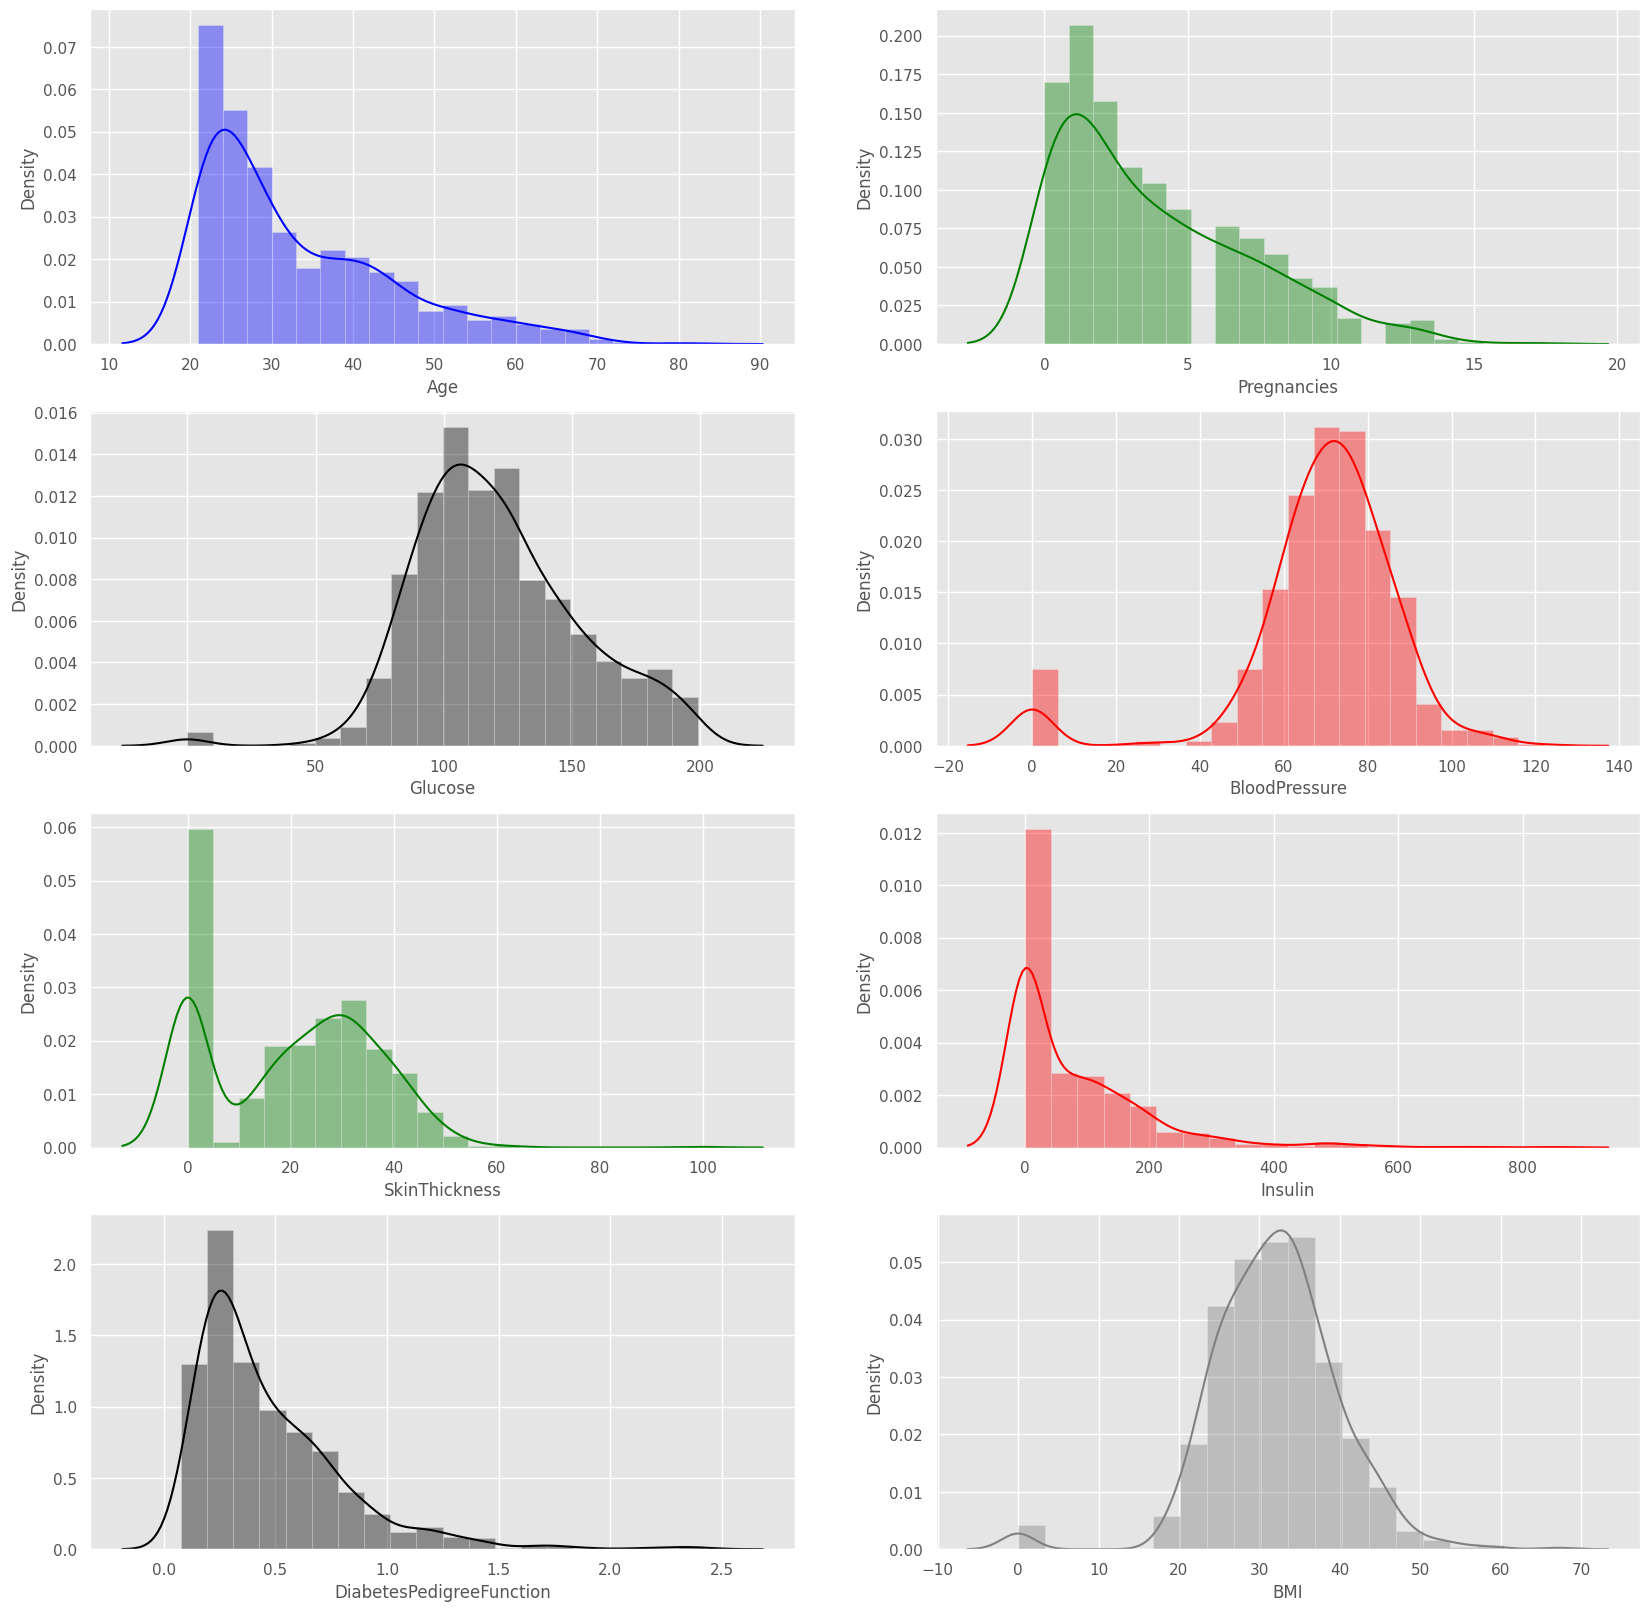

In [26]:
# Plot histogram and density graphs of all variables
fig, ax = plt.subplots(4,2, figsize=(20,20))
sns.distplot(data_frame.Age, bins = 20, ax=ax[0,0], color="blue")
sns.distplot(data_frame.Pregnancies, bins = 20, ax=ax[0,1], color="green")
sns.distplot(data_frame.Glucose, bins = 20, ax=ax[1,0], color="black")
sns.distplot(data_frame.BloodPressure, bins = 20, ax=ax[1,1], color="red")
sns.distplot(data_frame.SkinThickness, bins = 20, ax=ax[2,0], color="green")
sns.distplot(data_frame.Insulin, bins = 20, ax=ax[2,1], color="red")
sns.distplot(data_frame.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0], color="black")
sns.distplot(data_frame.BMI, bins = 20, ax=ax[3,1], color="gray")

In [27]:
data_frame.groupby("Outcome").agg({"Pregnancies":"mean"})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [28]:
data_frame.groupby("Outcome").agg({"Age":"mean"})

,Age
Outcome,
0,31.190000
1,37.067164


In [29]:
data_frame.groupby("Outcome").agg({"Age":"max"})

,Age
Outcome,
0,81
1,70


In [30]:
data_frame.groupby("Outcome").agg({"Insulin": "mean"})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [31]:
data_frame.groupby("Outcome").agg({"Insulin": "max"})

,Insulin
Outcome,
0,744
1,846


In [32]:
data_frame.groupby("Outcome").agg({"Glucose": "mean"})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [34]:
data_frame.groupby("Outcome").agg({"Glucose": "max"})

,Glucose
Outcome,
0,197
1,199


In [35]:
data_frame.groupby("Outcome").agg({"BMI": "mean"})

,BMI
Outcome,
0,30.304200
1,35.142537


In [37]:
# corr() is used to find the pairwise correlation of all columns in the dataframe
data_frame.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000
